In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
import seaborn as sns

In [33]:
data = pd.read_excel("./Datasets/HVAC_limpio.xlsx", "HVAC_limpio", index_col=0)
#data

In [34]:
data['Fecha- hora de lectura'] = (data['Fecha- hora de lectura'] - data['Fecha- hora de lectura'].min())  / np.timedelta64(1,'D')
#data.drop(['Fecha- hora de lectura'], axis=1, inplace=True)

In [23]:
data.columns

Index(['Fecha- hora de lectura', 'POTENCIA TRAFO 2', 'POTENCIA TRAFO 3',
       'POTENCIA TRAFO 4', 'POTENCIA TRAFO 5', 'POTENCIA MEDIA CONECTADA',
       'PERIODO P6', 'CONTROL FRÍO', 'CONTROL CALOR',
       'CAPACIDAD BOMBA CALOR FELIPE %', 'CAPACIDAD BOMBA CALOR CARLOS %',
       'POTENCIA BOMBA CALOR FELIPE', 'POTENCIA BOMBA CALOR CARLOS',
       'TEMPERATURA AMBIENTE BOMBA CALOR CARLOS',
       'TEMPERATURA AMBIENTE BOMBA CALOR FELIPE', 'TEMPERATURA EXTERIOR',
       'CAPACIDAD GRUPO DE FRÍO 1', 'CAPACIDAD GRUPO DE FRÍO 2',
       'POTENCIA GRUPO FRÍO 1', 'POTENCIA GRUPO FRÍO 2',
       'ENTRADA AGUA A TORRE 1', 'SALIDA AGUA TORRE 1',
       'ENTRADA AGUA A TORRE 2', 'SALIDA AGUA TORRE 2',
       'C_O_P MÁQUINA GRUPO FRÍO 1', 'C_O_P MÁQUINA GRUPO FRÍO 2',
       'C_O_P BOMBA CALOR CARLOS', 'C_O_P BOMBA CALOR FELIPE',
       'TEMPERATURA SALIDA BOMBA CALOR CARLOS',
       'TEMPERATURA SALIDA BOMBA CALOR FELIPE',
       'KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS',
       'KILO CALO

In [35]:
correlacion = data.corr()
#correlacion

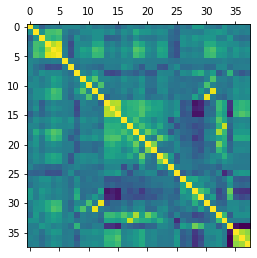

In [25]:
plt.matshow(data.corr())

In [26]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim != None:
        plt.ylim(*ylim)
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt

Los valores a predecir son: 'POTENCIA BOMBA CALOR FELIPE', 'POTENCIA BOMBA CALOR CARLOS', 'POTENCIA GRUPO FRÍO 1', 'POTENCIA GRUPO FRÍO 2'

## Regresión Lineal

In [219]:
from sklearn.linear_model import LinearRegression

def linearRegression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    predicts = reg.predict(X_test)
    acc = reg.score(X_test, y_test)
    print("The accuracy of Linear Regression is: ", acc)
    print("The predicts are: ", predicts)
    return reg

In [220]:
X = data

The accuracy of Linear Regression is:  1.0
The predicts are:  [  0.80000001   0.60000002   0.63999999 ... 124.30400085   0.80000001
   0.63999999]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

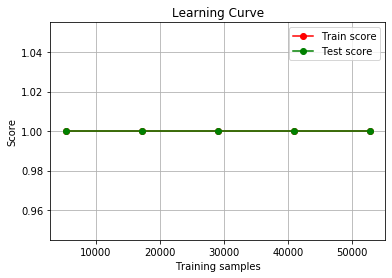

In [221]:
yCalorFelipe = data['POTENCIA BOMBA CALOR FELIPE']
regCalorFelipe = linearRegression(X, yCalorFelipe)
plot_learning_curve(regCalorFelipe, "Learning Curve", X, yCalorFelipe)

The accuracy of Linear Regression is:  1.0
The predicts are:  [ 0.47999999 87.67333221 93.7440033  ...  0.47999999  0.40000001
 32.88533401]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

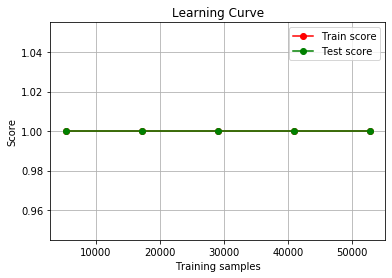

In [222]:
yCalorCarlos = data['POTENCIA BOMBA CALOR CARLOS']
regCalorCarlos = linearRegression(X, yCalorCarlos)
plot_learning_curve(regCalorCarlos, "Learning Curve", X, yCalorCarlos)

The accuracy of Linear Regression is:  1.0
The predicts are:  [82.35333252 37.41333389 84.35333252 ... 77.0533371   0.1
 77.94999695]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

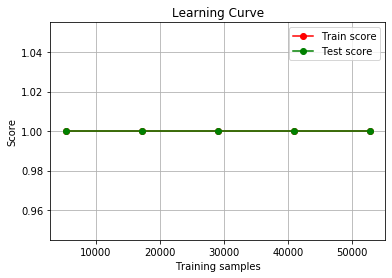

In [223]:
yFrio1 = data['POTENCIA GRUPO FRÍO 1']
regFrio1 = linearRegression(X, yFrio1)
plot_learning_curve(regFrio1, "Learning Curve", X, yFrio1)

The accuracy of Linear Regression is:  1.0
The predicts are:  [68.3133316  36.5933342   0.1        ... 62.84000015 28.23999977
  0.1       ]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

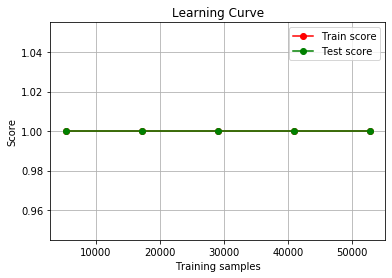

In [224]:
yFrio2 = data['POTENCIA GRUPO FRÍO 2']
regFrio2 = linearRegression(X, yFrio2)
plot_learning_curve(regFrio2, "Learning Curve", X, yFrio2)

## Extra Trees Regressor

Esta clase implementa un metaestimulador que se ajusta a varios árboles de decisión aleatorios en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste.

In [225]:
from sklearn.ensemble import ExtraTreesRegressor

def extraTreesRegressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    reg = ExtraTreesRegressor(n_estimators=10, max_depth=5)
    reg.fit(X_train, y_train)
    predicts = reg.predict(X_test)
    acc = reg.score(X_test, y_test)
    print("The accuracy of Extra Trees Regressor is: ", acc)
    print("The predicts are: ", predicts)
    return reg

In [226]:
X = data

The accuracy of Extra Trees Regressor is:  0.998671259570392
The predicts are:  [107.70010727   0.67236426   0.67236426 ...  40.32688535   0.65264018
   0.67236426]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

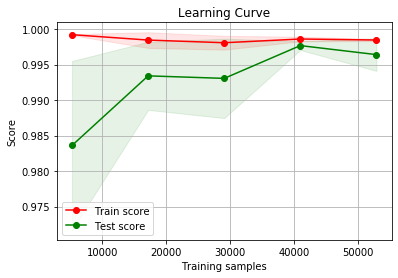

In [227]:
yCalorFelipe = data['POTENCIA BOMBA CALOR FELIPE']
regCalorFelipe = extraTreesRegressor(X, yCalorFelipe)
plot_learning_curve(regCalorFelipe, "Learning Curve", X, yCalorFelipe)

The accuracy of Extra Trees Regressor is:  0.9983385131734903
The predicts are:  [ 0.4806508   0.47783894  0.47783894 ... 90.55910175 88.96302901
  0.4712801 ]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

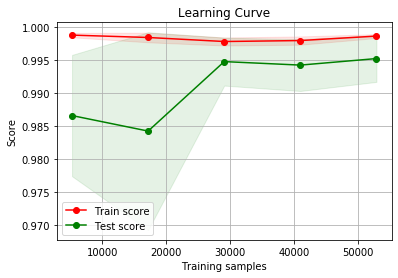

In [158]:
yCalorCarlos = data['POTENCIA BOMBA CALOR CARLOS']
regCalorCarlos = extraTreesRegressor(X, yCalorCarlos)
plot_learning_curve(regCalorCarlos, "Learning Curve", X, yCalorCarlos)

The accuracy of Extra Trees Regressor is:  0.9959641640448396
The predicts are:  [23.73987894  0.55753718  0.25026656 ... 21.75275119  0.56291965
 31.67285612]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

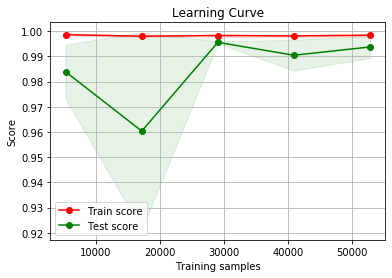

In [159]:
yFrio1 = data['POTENCIA GRUPO FRÍO 1']
regFrio1 = extraTreesRegressor(X, yFrio1)
plot_learning_curve(regFrio1, "Learning Curve", X, yFrio1)

The accuracy of Extra Trees Regressor is:  0.9984315016033122
The predicts are:  [ 0.11131267  0.11131283 34.79666149 ... 54.25296723 76.94902644
 77.78924446]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

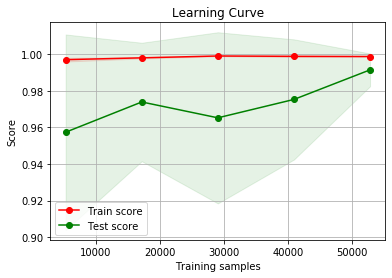

In [160]:
yFrio2 = data['POTENCIA GRUPO FRÍO 2']
regFrio2 = extraTreesRegressor(X, yFrio2)
plot_learning_curve(regFrio2, "Learning Curve", X, yFrio2)

## KNeighbors Regressor

Regresión basada en k vecinos más cercanos.
El objetivo se predice mediante la interpolación local de los objetivos asociados a los vecinos más cercanos en el conjunto de entrenamiento.

In [202]:
from sklearn.neighbors import KNeighborsRegressor

def kNeighborsRegressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    neigh = KNeighborsRegressor(n_neighbors=4)
    neigh.fit(X_train, y_train) 
    predicts = neigh.predict(X_test)
    acc = neigh.score(X_test, y_test)
    print("The accuracy of KNeighbors Regressor is: ", acc)
    print("The predicts are: ", predicts)
    return neigh

In [197]:
X = data

The accuracy of Extra Trees Regressor is:  0.9477616569492456
The predicts are:  [11.18433338  0.72000003  0.63999999 ...  0.63999999  0.63999999
 17.70933294]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

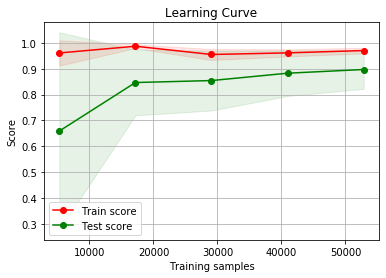

In [198]:
yCalorFelipe = data['POTENCIA BOMBA CALOR FELIPE']
neighCalorFelipe = kNeighborsRegressor(X, yCalorFelipe)
plot_learning_curve(neighCalorFelipe, "Learning Curve", X, yCalorFelipe)

The accuracy of Extra Trees Regressor is:  0.9507861543384234
The predicts are:  [ 5.94000015  0.47999999 68.43033409 ...  0.47999999  0.425
 28.97600031]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

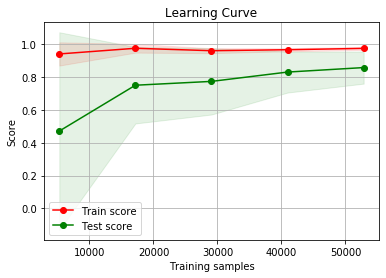

In [199]:
yCalorCarlos = data['POTENCIA BOMBA CALOR CARLOS']
neighCalorCarlos = kNeighborsRegressor(X, yCalorCarlos)
plot_learning_curve(neighCalorCarlos, "Learning Curve", X, yCalorCarlos)

The accuracy of Extra Trees Regressor is:  0.8493678429153728
The predicts are:  [ 0.1125      0.1         0.1        ... 20.75259238 71.02333736
  0.1       ]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

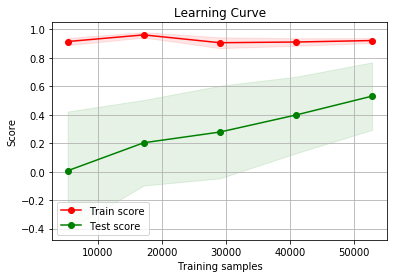

In [200]:
yFrio1 = data['POTENCIA GRUPO FRÍO 1']
neighFrio1 = kNeighborsRegressor(X, yFrio1)
plot_learning_curve(neighFrio1, "Learning Curve", X, yFrio1)

The accuracy of Extra Trees Regressor is:  0.8957070393780175
The predicts are:  [ 0.1         0.1        35.58916569 ... 17.3         0.1
  0.1       ]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

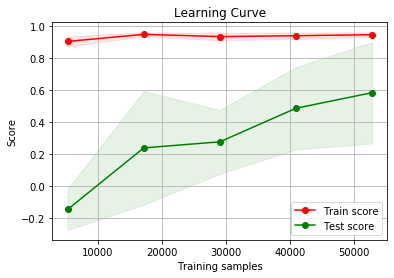

In [201]:
yFrio2 = data['POTENCIA GRUPO FRÍO 2']
neighFrio2 = kNeighborsRegressor(X, yFrio2)
plot_learning_curve(neighFrio2, "Learning Curve", X, yFrio2)

## Random Forest Regressor

Un *Random Forest* es un metaestimulador que se ajusta a varios árboles de decisión de clasificación en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste. 
El tamaño de la submuestra siempre es el mismo que el tamaño de la muestra de entrada original.

In [212]:
from sklearn.ensemble import RandomForestRegressor

def randomForestRegressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    reg = RandomForestRegressor(n_estimators=100, max_depth=4)
    reg.fit(X_train, y_train)
    predicts = reg.predict(X_test)
    acc = reg.score(X_test, y_test)
    print("The accuracy of Random Forest Regressor is: ", acc)
    print("The predicts are: ", predicts)
    return reg

In [213]:
X = data

The accuracy of Random Forest Regressor is:  0.9984959817660013
The predicts are:  [ 93.11524026 138.80812396  84.97374572 ... 138.80812396 116.5827231
   0.65998112]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

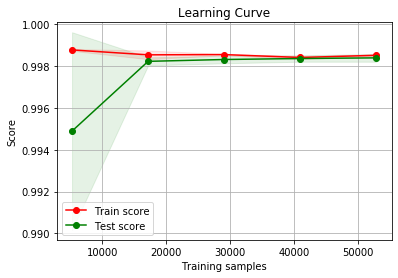

In [214]:
yCalorFelipe = data['POTENCIA BOMBA CALOR FELIPE']
regCalorFelipe = randomForestRegressor(X, yCalorFelipe)
plot_learning_curve(regCalorFelipe, "Learning Curve", X, yCalorFelipe)

The accuracy of Random Forest Regressor is:  0.9980313634648829
The predicts are:  [  0.48619598   0.48619598   0.48619598 ...   0.48619598   0.48619598
 130.5466875 ]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

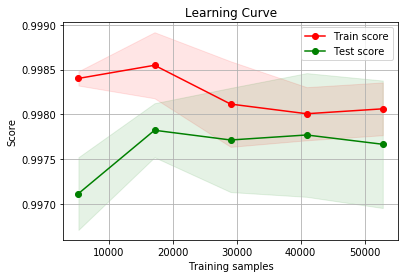

In [215]:
yCalorCarlos = data['POTENCIA BOMBA CALOR CARLOS']
regCalorCarlos = randomForestRegressor(X, yCalorCarlos)
plot_learning_curve(regCalorCarlos, "Learning Curve", X, yCalorCarlos)

The accuracy of Random Forest Regressor is:  0.9980548965536123
The predicts are:  [59.06473218 59.06473218  0.10028871 ...  0.10028871 31.62829167
  0.10028871]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

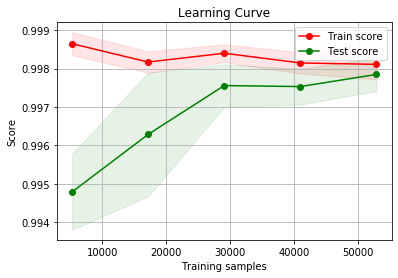

In [216]:
yFrio1 = data['POTENCIA GRUPO FRÍO 1']
regFrio1 = randomForestRegressor(X, yFrio1)
plot_learning_curve(regFrio1, "Learning Curve", X, yFrio1)

The accuracy of Random Forest Regressor is:  0.9986950571581287
The predicts are:  [71.15911538 33.3473042  79.48452078 ... 33.3146895   0.10259541
  0.10259541]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

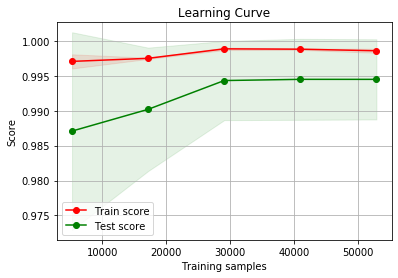

In [217]:
yFrio2 = data['POTENCIA GRUPO FRÍO 2']
regFrio2 = randomForestRegressor(X, yFrio2)
plot_learning_curve(regFrio2, "Learning Curve", X, yFrio2)

## Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

def decisionTreeRegressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    reg = DecisionTreeRegressor(max_depth=4)
    reg.fit(X_train, y_train)
    predicts = reg.predict(X_test)
    acc = reg.score(X_test, y_test)
    print("The accuracy of Decision Tree Regressor is: ", acc)
    print("The predicts are: ", predicts)
    return reg

In [28]:
X = data

The accuracy of Decision Tree Regressor is:  0.9983915007414172
The predicts are:  [ 0.65920831 93.08224194  0.65920831 ...  0.65920831  0.65920831
  0.65920831]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

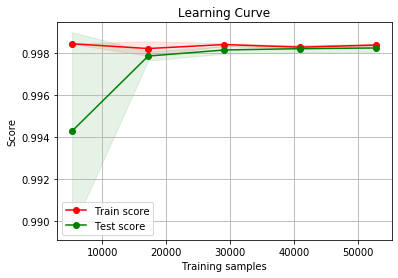

In [29]:
yCalorFelipe = data['POTENCIA BOMBA CALOR FELIPE']
regCalorFelipe = decisionTreeRegressor(X, yCalorFelipe)
plot_learning_curve(regCalorFelipe, "Learning Curve", X, yCalorFelipe)

The accuracy of Decision Tree Regressor is:  0.9978460972896414
The predicts are:  [141.49725948   0.48606464   0.48606464 ...  92.19150408 115.9130125
   0.48606464]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

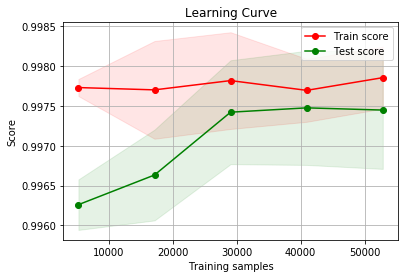

In [30]:
yCalorCarlos = data['POTENCIA BOMBA CALOR CARLOS']
regCalorCarlos = decisionTreeRegressor(X, yCalorCarlos)
plot_learning_curve(regCalorCarlos, "Learning Curve", X, yCalorCarlos)

The accuracy of Decision Tree Regressor is:  0.9979179154295285
The predicts are:  [20.10357567  2.36923381  0.10038396 ...  0.10038396  0.10038396
 80.01855702]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

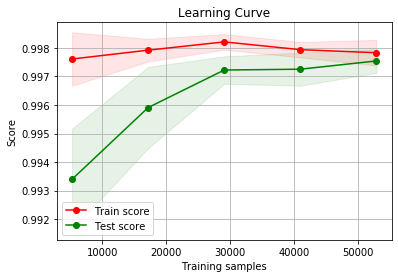

In [31]:
yFrio1 = data['POTENCIA GRUPO FRÍO 1']
regFrio1 = decisionTreeRegressor(X, yFrio1)
plot_learning_curve(regFrio1, "Learning Curve", X, yFrio1)

The accuracy of Decision Tree Regressor is:  0.9982529707098077
The predicts are:  [71.11838634  0.10049766 33.32503569 ... 21.03286627 55.90827166
  0.10049766]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

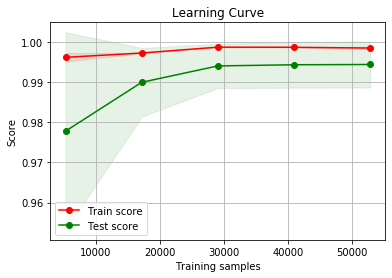

In [32]:
yFrio2 = data['POTENCIA GRUPO FRÍO 2']
regFrio2 = decisionTreeRegressor(X, yFrio2)
plot_learning_curve(regFrio2, "Learning Curve", X, yFrio2)

## MultiOutput Regressor

Esta estrategia consiste en ajustar un *regressor* por objetivo. 
Esta es una estrategia simple para extender *regressors* que no admiten de forma nativa la regresión de múltiples objetivos.